<h1>Remojo, Mary Angela</h1>
<h3>ELEC303 MIDTERMS EXAM</h3>

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\cherd\Downloads\ELEC03\Chicago_Crimes.csv")

In [3]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
df['Date'] = df['Date'].astype(str).str.replace('/', '-').str.strip()
df['Date_parsed'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

df['Year'] = df['Date_parsed'].dt.year
df['Month'] = df['Date_parsed'].dt.month
df['DayOfWeek'] = df['Date_parsed'].dt.day_name()
df['Hour'] = df['Date_parsed'].dt.hour

df['DayType'] = 'Weekday'
df.loc[df['DayOfWeek'].isin(['Saturday','Sunday']), 'DayType'] = 'Weekend'


In [5]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Date_parsed,Month,Hour
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000,249123,249123.000000,249123.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845,2024-10-03 08:31:57.251478528,6.680058,12.521084
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567,2024-04-14 00:00:00,1.000000,0.000000
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071,2024-07-06 13:45:30,4.000000,8.000000
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690,2024-09-27 03:00:00,7.000000,13.000000
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233,2024-12-28 18:20:00,9.000000,18.000000
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531,2025-04-12 00:00:00,12.000000,23.000000
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875,NaN,3.314884,6.843107


<h1>1. How many incidents are there per year?</h1>

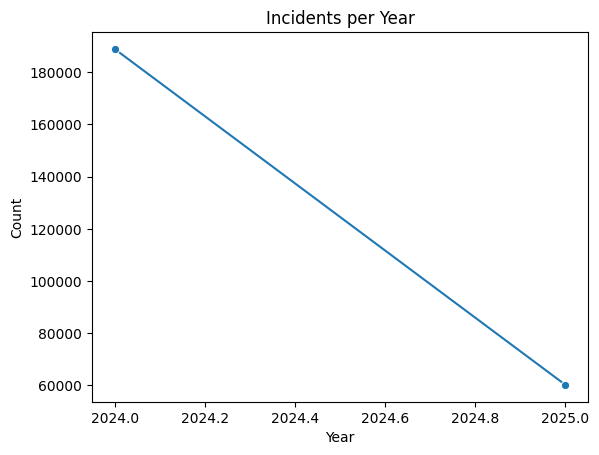

In [6]:
year_counts = df['Year'].value_counts()
year_counts

sns.lineplot(x=year_counts.index, y=year_counts, marker='o')
plt.title('Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<h3>INSIGHTS #1: Shown in the graph, the year 2024 has the highest incidents compared to 2025. In the year 2025 the incidents lowered from 180k to 60k number of incidents.</h3>
<h3>INSIGHTS #2: The graph also shows the decline rate of incidents through the years, this shows that the police are doing a great job keeping the city safe.</h3>

<h1>2. What are the most common primary crime types in Chicago?</h1>

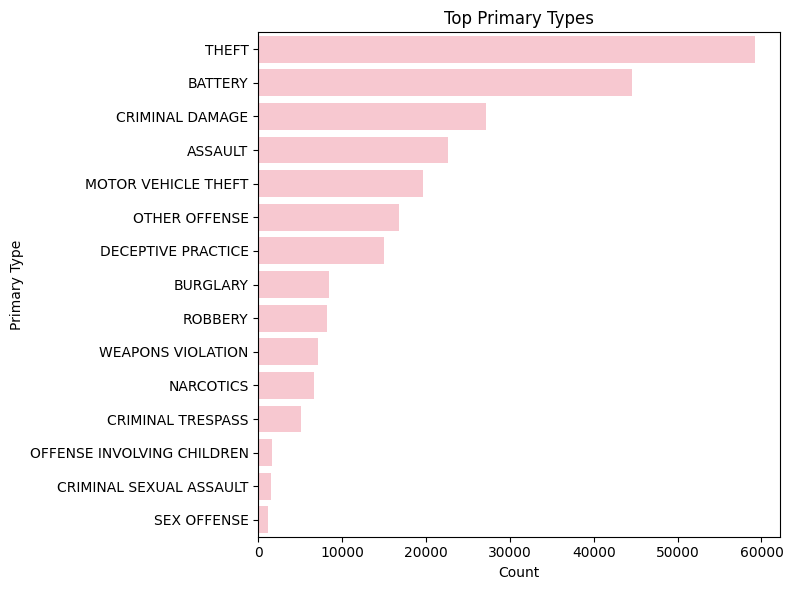

In [43]:
top12_primary = df['Primary Type'].value_counts().head(15)
top12_primary

plt.figure(figsize=(8,6))
sns.barplot(y=top12_primary.index, x=top12_primary.values, color='pink')
plt.title('Top Primary Types')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


<h3>INSIGHT #1: The graph shows exactly 15 primary crime types in chicago, with Theft and Battery having the highest crime rate than the others.</h3>
<h3>INSIGHTS #2: As shown in the graph Theft is leading the crime types with a number of 60k crimes that happened in Chicago, with Sex Offense as the lowest one in the graph with a number between 0-10.k</h3>

<h1>3. What are the top 15 specific crime descriptions reported?</h1>

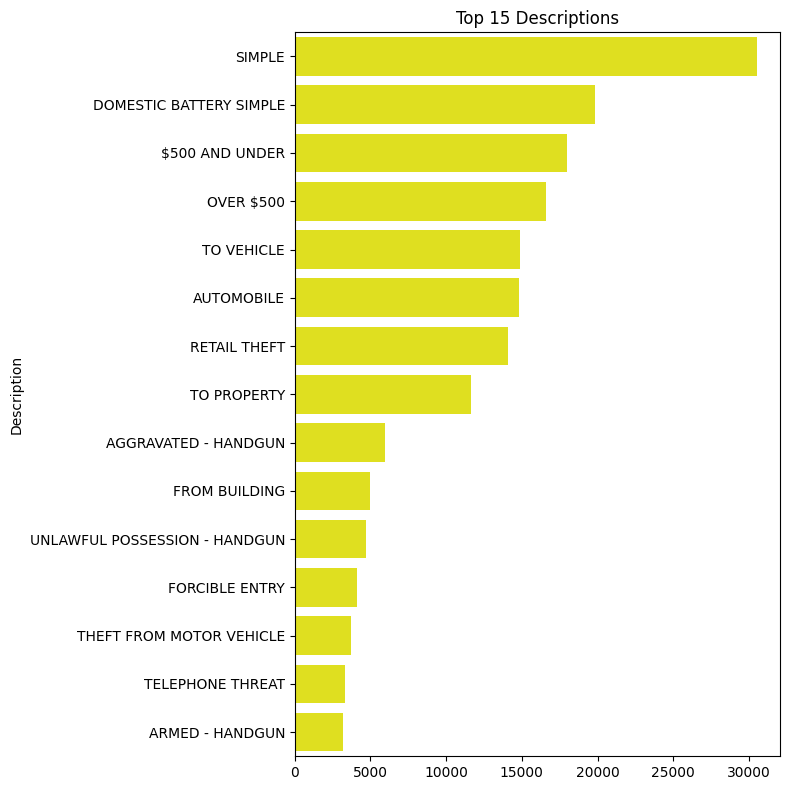

In [44]:
top15_desc = df['Description'].value_counts().head(15)
top15_desc

plt.figure(figsize=(8,8))
sns.barplot(y=top15_desc.index, x=top15_desc.values, color='yellow')
plt.title('Top 15 Descriptions')
plt.tight_layout()
plt.show()


<h3>INSIGHTS #1: The graph shows specific descriptions reported, with simple crimes leading the top and armed crimes as the lowest.</h3>
<h3>INSIGHTS #2: The graph explains how even the simple types of crimes happeneds the most than the threatening types of crimes. As the simplest types of crimes are leading the graph, people should be careful because even the simplest types of crimes can happened anytime. </h3>

<h1>4. How many incidents are there per month?</h1>

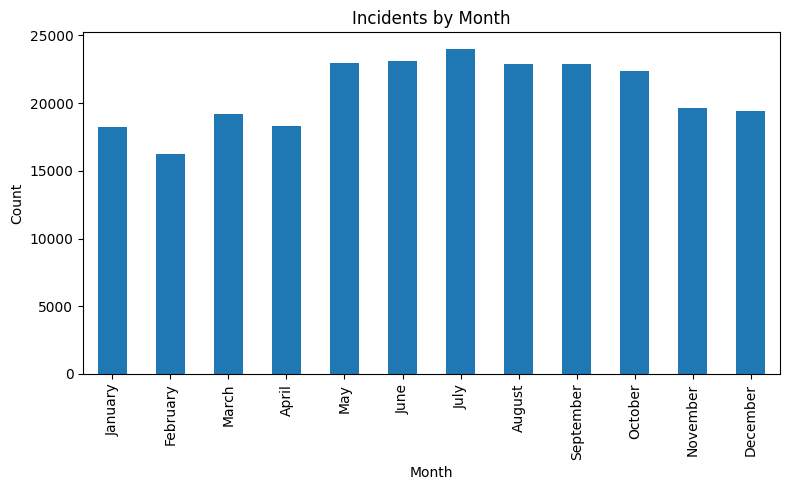

In [9]:
month_counts = df['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

plt.figure(figsize=(8,5))
month_counts.index = month_counts.index.map(month_names)
month_counts.plot(kind='bar')
plt.title('Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(0,12))
plt.tight_layout()
plt.show()

<h3>INSIGHTS #1: According to the graph, the month of July has the highest incidents with a scope of 20k to 25k incidents. February as the lowest with a number of 15k incidents.</h3>

<h1>5. Which day of the week has the most incidents?</h1>

DayOfWeek
Monday       35872
Tuesday      34857
Wednesday    35294
Thursday     34553
Friday       36470
Saturday     36257
Sunday       35820
Name: count, dtype: int64

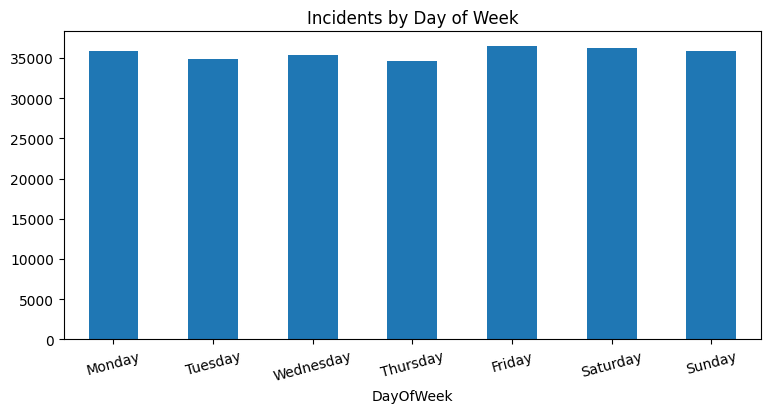

In [10]:
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_counts = df['DayOfWeek'].value_counts().reindex(dow_order).dropna()
display(dow_counts)

plt.figure(figsize=(9,4))
dow_counts.plot(kind='bar')
plt.title('Incidents by Day of Week')
plt.xticks(rotation=15)

plt.show()

<h3>INSIGHTS #1: As shown in the graph, the day of the week that has the most incidents mostly occur on Fridays with a number of 36470 incidents. Saturday being the second to the highest witn a number of 36257 incidents.</h3>
<h3>INSIGHTS #2: With weekdays having the highest incident rates it's best if they can prevent those incidents by taking extra precautions especially when outside their homes.</h3>

<h1>6. Which location has the highest incidents in Chicago?</h1>

Location Description
STREET                                    66040
APARTMENT                                 47787
RESIDENCE                                 29776
SIDEWALK                                  13265
SMALL RETAIL STORE                         9858
PARKING LOT / GARAGE (NON RESIDENTIAL)     8350
RESTAURANT                                 6094
DEPARTMENT STORE                           5768
ALLEY                                      5695
OTHER (SPECIFY)                            4072
COMMERCIAL / BUSINESS OFFICE               3712
VEHICLE NON-COMMERCIAL                     3667
Name: count, dtype: int64

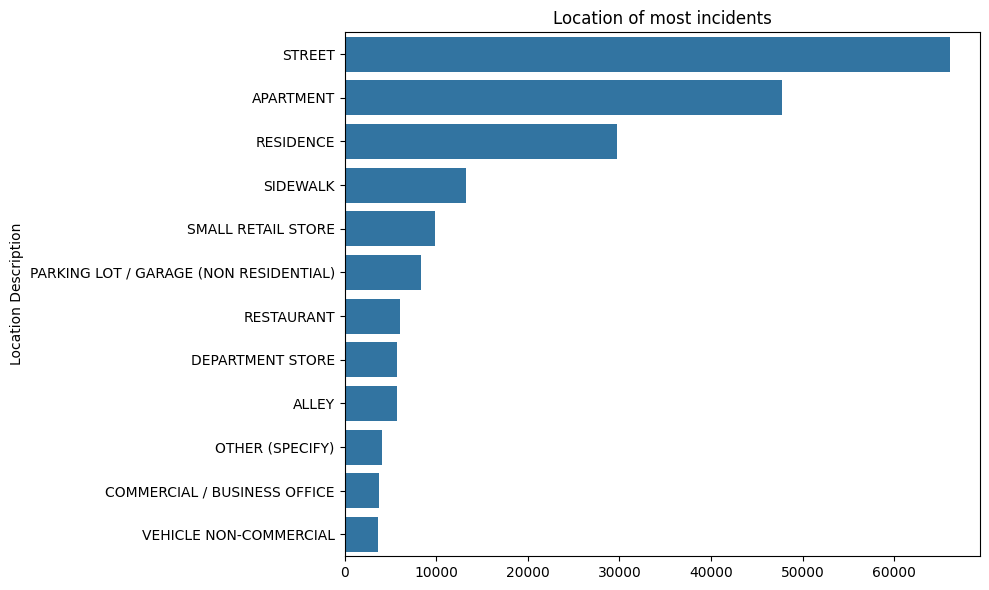

In [11]:
loc_top = df['Location Description'].value_counts().head(12)
display(loc_top)

plt.figure(figsize=(10,6))
sns.barplot(y=loc_top.index, x=loc_top.values)
plt.title('Location of most incidents')
plt.tight_layout()
plt.show()


<h3>INSIGHTS #1: Street has the highest incident rates with a number of 66040 incidents, with the vehicle types as the lowest.</h3>
<h3>INSIGHTS #2: It's best for people to be more extra carefull in the streets to avoid unexpected incidents that way we can lower the number of incidents in the area.</h3>

<h1>7. What type of crime has the highest chance of getting arrested?</h1>

Primary Type
GAMBLING                             1.000000
CONCEALED CARRY LICENSE VIOLATION    0.987952
LIQUOR LAW VIOLATION                 0.968750
NARCOTICS                            0.958352
PROSTITUTION                         0.951220
PUBLIC INDECENCY                     0.923077
INTERFERENCE WITH PUBLIC OFFICER     0.894942
NON-CRIMINAL                         0.750000
WEAPONS VIOLATION                    0.648520
OBSCENITY                            0.528302
PUBLIC PEACE VIOLATION               0.486083
CRIMINAL TRESPASS                    0.292567
OTHER NARCOTIC VIOLATION             0.285714
HOMICIDE                             0.265823
OTHER OFFENSE                        0.200703
Name: Arrest, dtype: float64

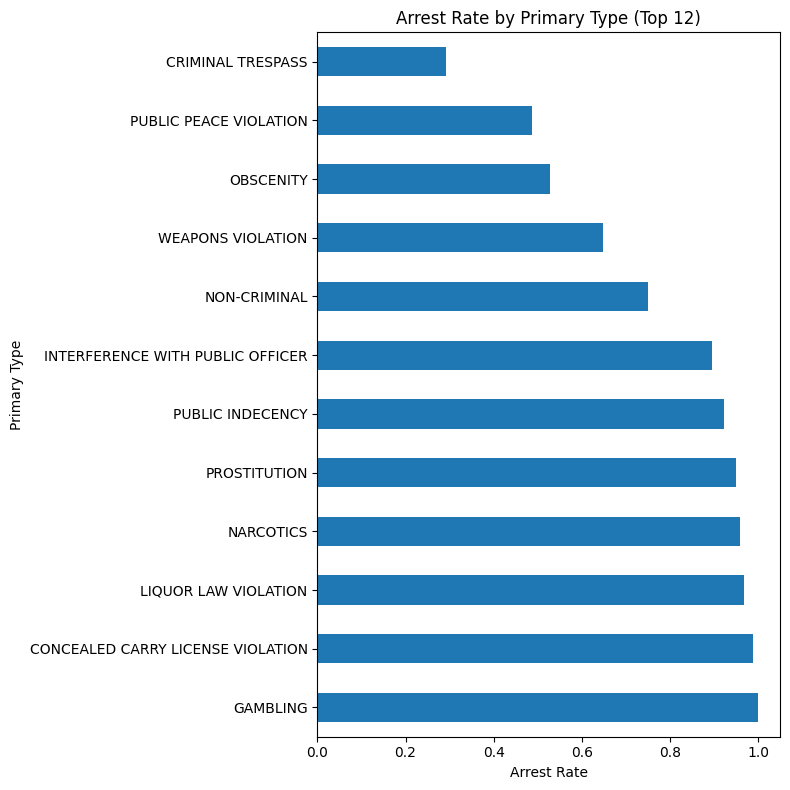

In [12]:
arrest_by_type = df.groupby('Primary Type')['Arrest'].mean()
display(arrest_by_type.sort_values(ascending=False).head(15))

plt.figure(figsize=(8,8))
arrest_by_type.sort_values(ascending=False).head(12).plot(kind='barh')
plt.title('Arrest Rate by Primary Type (Top 12)')
plt.xlabel('Arrest Rate')
plt.tight_layout()
plt.show()


<h3>INSIGHTS #1: Gambling has the highest percentage rate of getting arrested with concealed carry license violation as the second.</h3>
<h3>INSIGHTS #2: Most of the time violent crimes has the higher rate of getting arrested but in Chicago the type of crime that will most likely get someone arrested is gambling, this shows that there are more gamblers in this city than violent people.</h3>
<h3>INSIGHTS #3: With homicide having 0.26% crime rates is a good to say that Chicago is somewhat peacefull and doesn't have much violent crimes. Althought having gambling as the highest crime rates is bit worrying, police or the government should make a more proper law and precautions to prevent people from gambling.</h3>

<h1>8. What block has the highest incident counts?</h1>

Block
001XX N STATE ST       668
0000X N STATE ST       463
0000X W TERMINAL ST    440
044XX N BROADWAY       328
076XX S CICERO AVE     304
011XX S CANAL ST       301
0000X E GRAND AVE      275
057XX S CICERO AVE     272
0000X S STATE ST       272
011XX S CLARK ST       269
026XX N ELSTON AVE     269
064XX N SHERIDAN RD    254
Name: count, dtype: int64

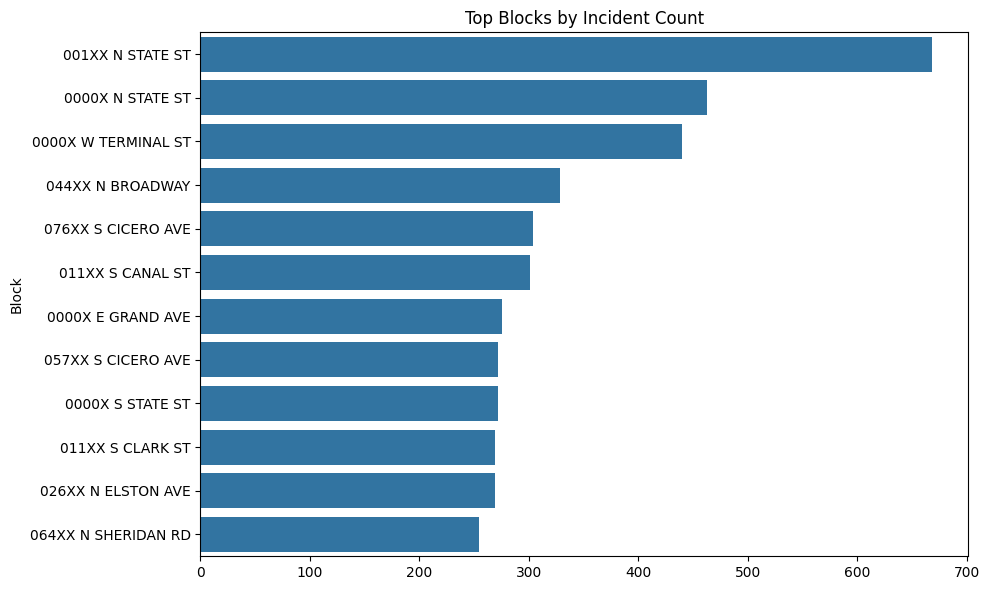

In [13]:
blocks_top = df['Block'].value_counts().head(12)
display(blocks_top)

plt.figure(figsize=(10,6))
sns.barplot(y=blocks_top.index, x=blocks_top.values)
plt.title('Top Blocks by Incident Count')
plt.tight_layout()
plt.show()

<h3>INSIGHTS #1: 001XX N STATE ST block has the highest incidents counts with a number of 668 incidents.</h3>
<h3>INSIGHTS #2: We can say that the blocks starting to 064XX N SHERIDAN RD to 0000X E GRAND AVE have a low count of incidents among the others that has 300-400 number of incidents.</h3>
<h3>INSIGHTS #3: Area starting from 0000X W TERMINAL ST to 001XX N STATE ST have a really high amount of incidents, we can say that these blocks are dangerous, people from that area block should be extra carefull.</h3>

<h1>9. Do crimes occur more on weekdays or weekends?</h1>

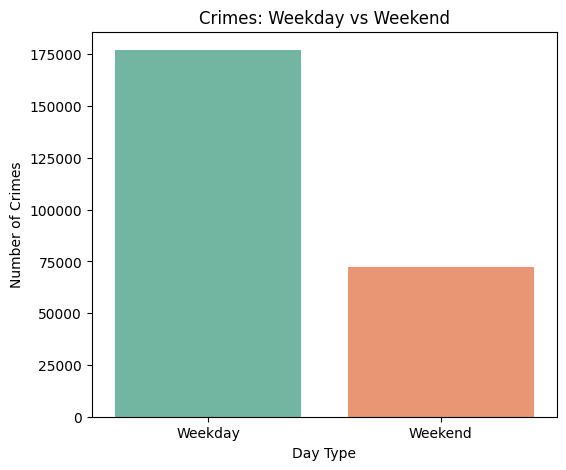

In [14]:
daytype_counts = df['DayType'].value_counts()
daytype_counts

plt.figure(figsize=(6,5))
sns.barplot(x=daytype_counts.index, y=daytype_counts.values, palette="Set2")
plt.title('Crimes: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Number of Crimes')
plt.show()


<h3>INISGHTS #1: The graph clearly shows a big diffirence between crimes that happened on weekends and weekdays. With weekday having a really high number of crimes that range to 175k number of incidents.</h3>
<h3>INSIGHTS #2: It's best to say that people are more busy on weekdays and they are outside often that crimes can occur unexpectedly. There are more days on weekdays so it's not a surprise that there are more incidents.</h3>

<h1>10. What percentage of crimes happen in the top 5 locations?</h1>

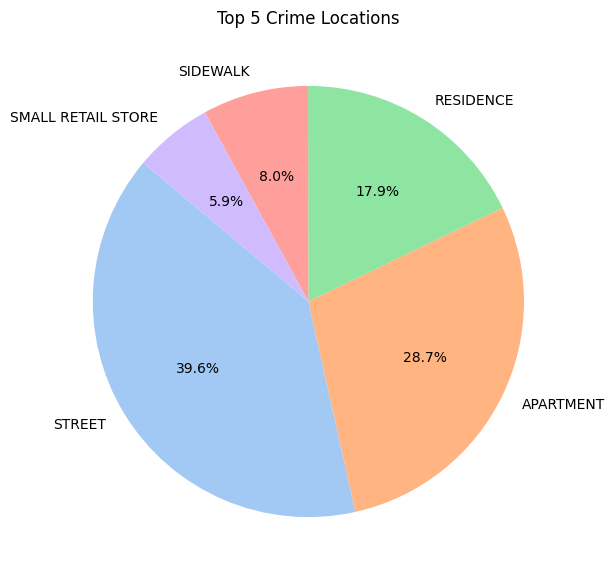

In [17]:
top5_locations = df['Location Description'].value_counts().head(5)
top5_locations

plt.figure(figsize=(7,7))
plt.pie(top5_locations.values, labels=top5_locations.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Top 5 Crime Locations')
plt.show()


<h3>INSIGHTS #1: We can see that theres already a lot of crimes happens in this chosen location, like streets, residences, and apartments. It would be better if they have more crime preventions on those areas.</h3>
<h3>INSIGHTS #2: Streets are the most dangerous locations, with 39.6%, compared to small retail stores at 5.9%. The big difference makes it clear where crime prevention policies should focus.</h3>

<h1>11. What times of day see the biggest split between arrests and no arrests?</h1>

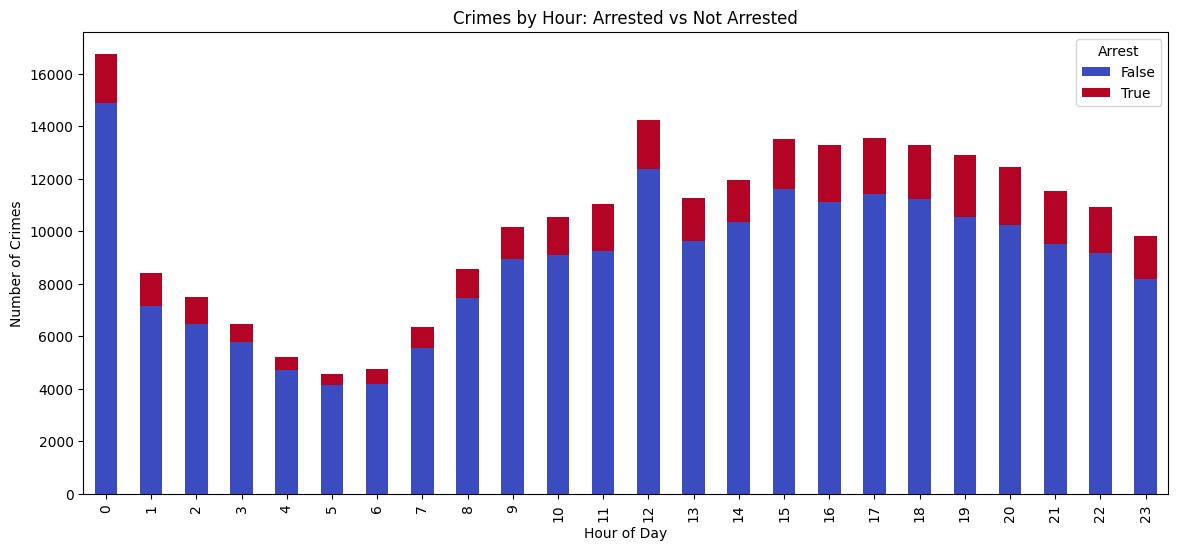

In [18]:
hour_arrest_split = df.groupby(['Hour','Arrest']).size().unstack(fill_value=0)

hour_arrest_split.plot(kind='bar', stacked=True, figsize=(14,6), colormap="coolwarm")
plt.title('Crimes by Hour: Arrested vs Not Arrested')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()


<h3>INSIGHTS #1: Late at night, most crimes don’t end in arrests, which makes sense since things like fights or theft happen quickly and people scatter. Daytime crimes see more arrests, probably because there are more witnesses.</h3>
<H3>INSIGHTS #2: Even though the graph shows the number of crime arrest depending on the time of day, people should still be careful anytime, most crimes doesn't happen in broad daylight, and most crimes that happens cannot be always known because they lack of witnesses.</H3>

<h1>12. What are the common crimes on weekdays?</h1>

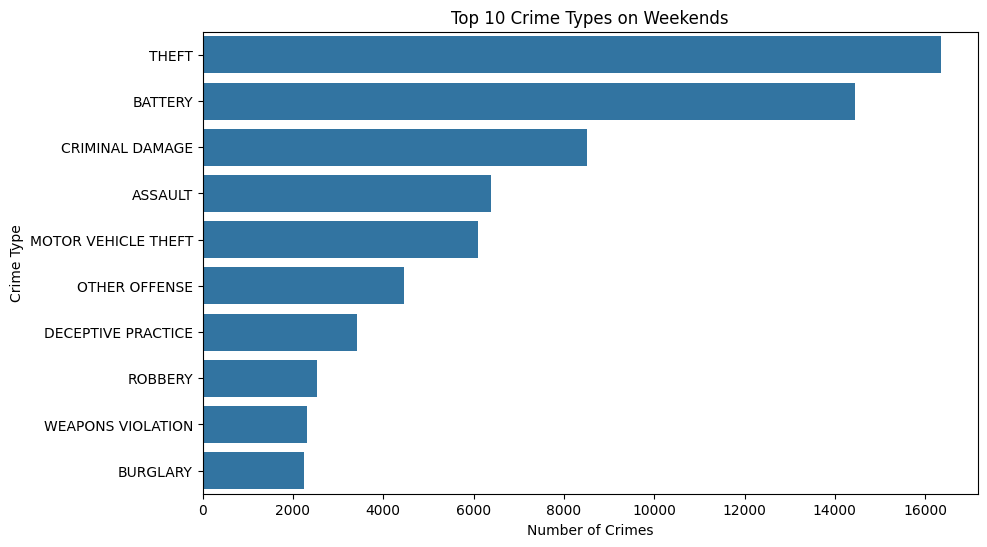

In [22]:
weekend_types = df[df['DayType']=='Weekend']['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=weekend_types.index, x=weekend_types.values)
plt.title('Top 10 Crime Types on Weekends')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()


<h3>INSIGHTS #1: We can see that Theft has the highest crime rate on weekdays, but there’s also a jump in battery from critical damage crimes.</h3>
<h3>INSIGHTS #2: Burglary as the lowest makes a lot of sense because people tend to be on their homes on weekdays that's why it's less likely for criminals to invade someones house when they are at home.</h3>

<h1>13. Which crime types are the most common overall?</h1>

<Axes: ylabel='count'>

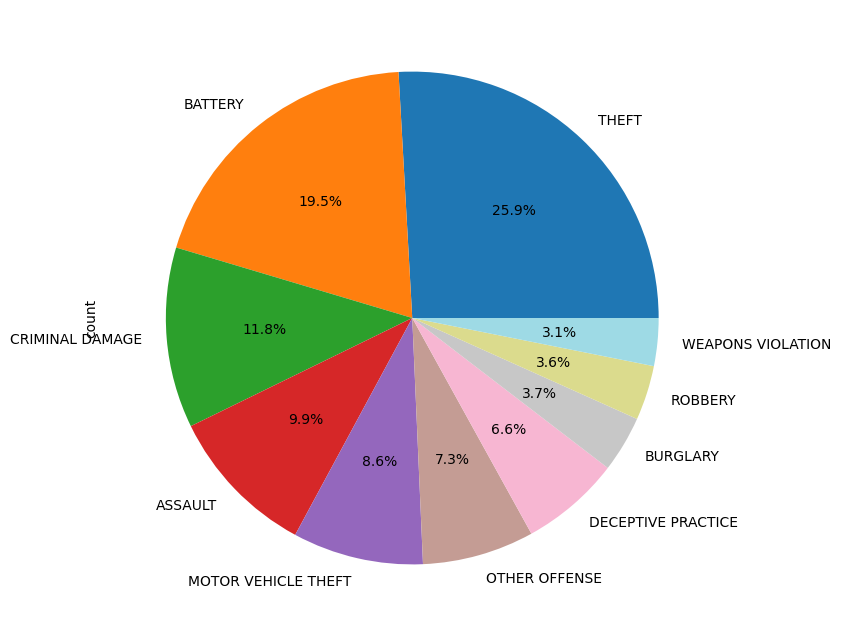

In [23]:
df['Primary Type'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), colormap='tab20')

<h3>INSIGHTS #1: Theft still being the highest crime, which make sense because Chicago is a big city where a lot of people roam. Battery as the second tells how Chicago city is a bit violent, polies should make more crime prevention to avoid assualts like this to happen.</h3>
<h3>INSIGHTS #2: The small categories should not be overlooked because despite having a tiny percentage they still make up for the thousands of crimes that happened in Chicago and people should be carefull.</h3>

<h1>14. Which location most likely for Theft to happen?</h1>

<Axes: ylabel='Location Description'>

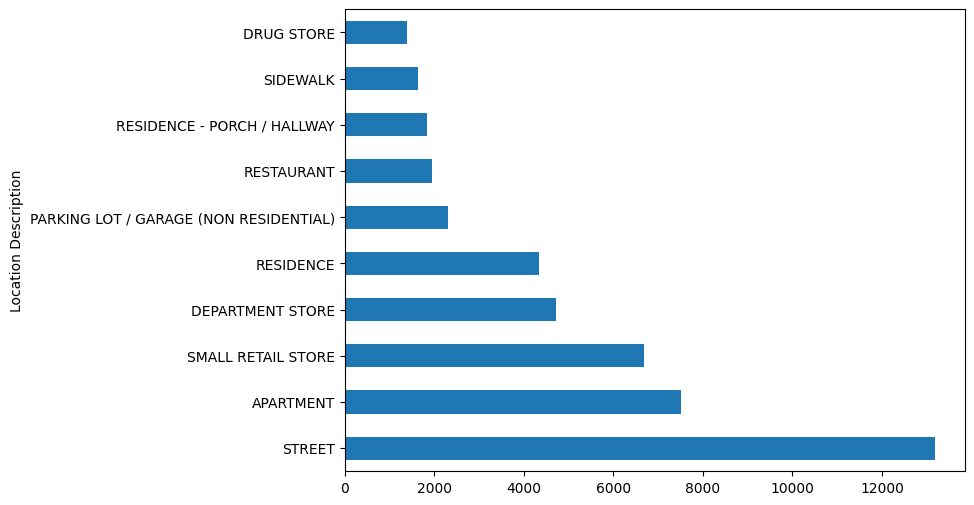

In [38]:
df[df['Primary Type'] == 'THEFT']['Location Description'].value_counts().head(10).plot(kind='barh', figsize=(8,6))

<h3>INSIGHTS #1: There's a big gap between the street and apartment. Theft are most likely to happen in the streets which make sense because the streets are busy most of the time, where people kept roaming, criminals find it easier to steal from others without them noticing.</h3>
<h3>INSIGHTS #2: Just because the other categories has numbers of cases doesn't mean that we should overlooked it, we should still be extra careful anywhere that way criminals won't be able to steal other peoples belongings.</h3>
<h3>INSIGHTS #3: There should be a better crime prevention policy in Chicago to avoid criminals from stealing. With almost 12k number of Theft that happens on the streets it would be better to add more patroling police in this area.</h3>

30 inisghts

<h1>15. What are the top 10 crime locations overall?</h1>

<Axes: ylabel='count'>

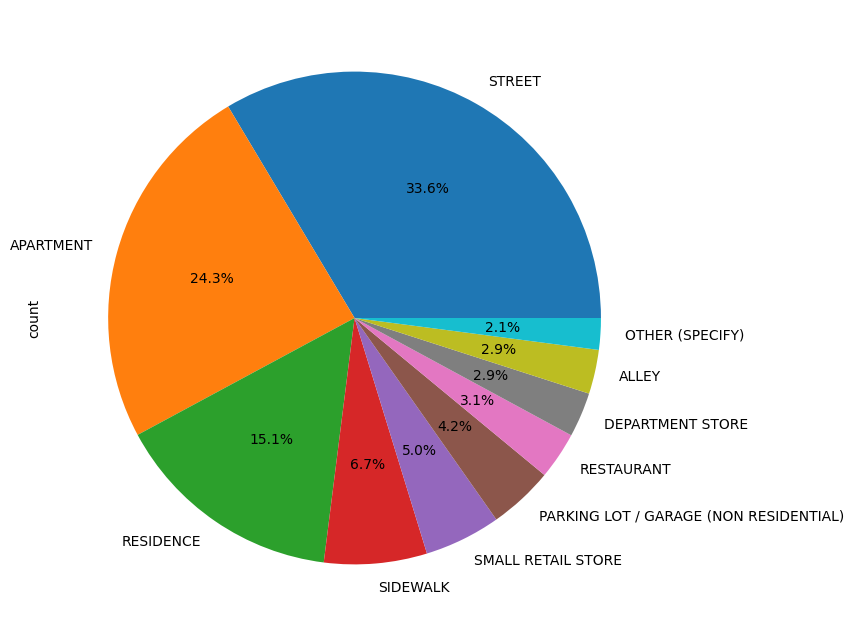

In [42]:
df['Location Description'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))

<h3>INSIGHTS #1: The pie chart makes it clear that streets, apartments, and sidewalks are where a lot of crimes happen. Streets being at the top isn’t surprising because there are more people in the streets walking, or roaming.</h3>
<h3>INSIGHTS #2: Apartments are high too, which shows how crime isn’t just a public-space thing, but also tied to personal spaces. Smaller slices like alleys or gas stations still matter; they just don’t make up as much of the overall total</h3>

<h1>16. Which crime types are most often linked to domestic incidents?</h1>

<Axes: ylabel='Primary Type'>

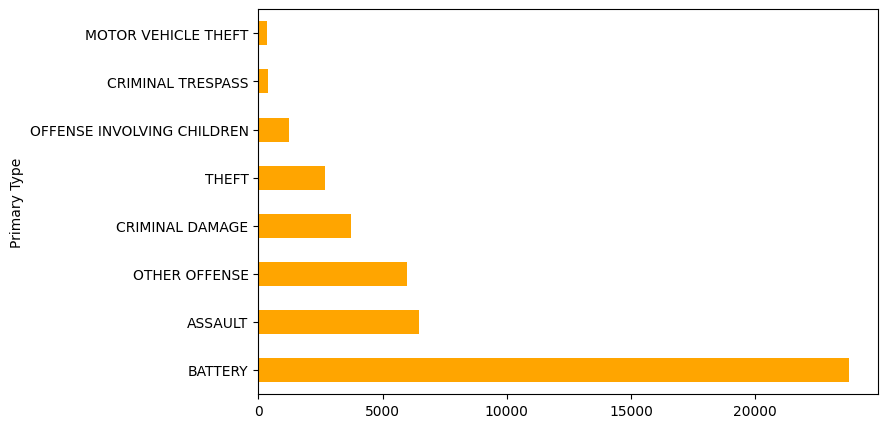

In [41]:
df[df['Domestic'] == True]['Primary Type'].value_counts().head(8).plot(kind='barh', figsize=(8,5), color='orange')

<h3>INISGHTS #1: Domestic cases mostly show up as assaults, batteries, and criminal damage. Most of these cases doesn't happened in public spaces, it occurs more in other people homes. This clearly shows how voilent Chicago city is. With this much number of Battery cases it's a bit concerning, especially since some assualts that happeneds in other poeple houses are not being reported bacause of fear.</h3>
<h3>INSIGHTS #2: The fact that assaults and batteries dominate shows how violence at home is a major driver of domestic incidents, not just arguments or threats. </h3>

<h1>17. What are the most common drug-related crimes?</h1>

<Axes: xlabel='Description'>

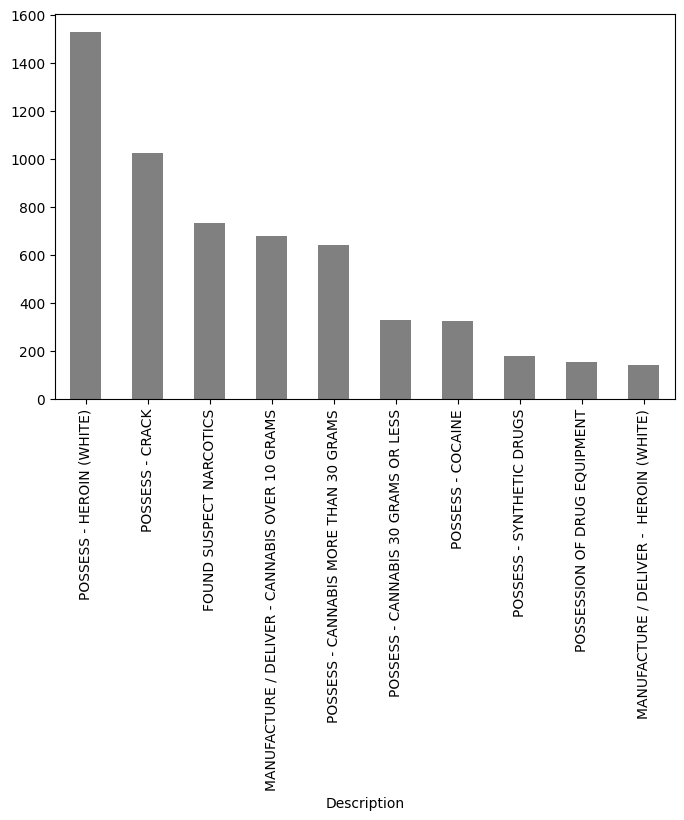

In [48]:
df[df['Primary Type'] == 'NARCOTICS']['Description'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='gray')


<h3>INISGHTS #1: The majority of drug arrests are for possession, which shows law enforcement is catching more users than high-level dealers. Law enforcements should work harder to catch those high-level dealers.</h3>
<h3>INSIGHTS #2 Distribution still appears but in much smaller numbers. That could mean trafficking is harder to detect, or that resources are mostly focused on street-level enforcement.</h3>

36 insights in total